In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import unidecode, unidecode
import datetime
%matplotlib inline

# 1 Select Data

In [2]:
# cot_mod = pd.read_excel("..\\..\\Datos\\working\\cotizaciones_all_cleaned.xlsx")
# cot_all = pd.read_csv("..\\..\\Datos\\working\\cotizaciones_all_cleaned.csv", index_col=[0], encoding = "ISO-8859-1")


In [3]:
# cot_mod.to_excel('..\\..\\Datos\\working\\cotizaciones_all_cleaned2.xlsx')
# cot_mod.to_csv('..\\..\\Datos\\working\\cotizaciones_all_cleaned2.csv')

In [40]:
cot_all = pd.read_csv("..\\..\\Datos\\working\\cotizaciones_all_cleaned2.csv", index_col=[0], encoding = "ISO-8859-1")
cot_mod = pd.read_csv("..\\..\\Datos\\working\\cotizaciones_all_cleaned2.csv", index_col=[0], encoding = "ISO-8859-1")
neg_all = pd.read_csv("..\\..\\Datos\\initial\\negocios_all.csv", index_col=[0], encoding = "ISO-8859-1")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
null_columns = cot_mod.columns[cot_mod.isnull().any()]
print(cot_mod[null_columns].isnull().sum().index)
cot_mod[null_columns].isnull().sum().sort_values()

Index(['Tipo de Medio', 'Productos', 'Presencial', 'Remoto', 'Total Productos',
       'Descuentos', 'Valor Final Venta', 'Apellido 1', 'Apellido 2',
       'Telefono', 'Celular', 'Direccion', 'Correo Electronico', 'Sexo',
       'Estado Civil', 'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente',
       'Razon Social', 'Giro', 'Nacionalidad', 'N° Grupo Familiar',
       'Actividad', 'Cargo', 'Situacion Laboral', 'Empleador',
       'Antiguedad Laboral', 'Profesión'],
      dtype='object')


Sexo                      1
Tipo Cliente              1
Total Productos          30
Apellido 1               39
Descuentos               44
Valor Final Venta        44
Correo Electronico       67
Celular                  73
Productos                83
Antiguedad Laboral      172
Tipo de Medio           532
Apellido 2             1994
Presencial             2027
Actividad              2348
Remoto                 3310
Rango Edad             5647
Estado Civil           7111
Profesión              9223
N° Grupo Familiar      9673
Direccion             11384
Nacionalidad          11747
Fecha Nacimiento      12698
Situacion Laboral     12939
Empleador             13855
Cargo                 14002
Telefono              14914
Razon Social          16555
Giro                  16556
dtype: int64

In [42]:
cot_mod['Descuentos'] = cot_mod['Descuentos'].fillna(0)

In [43]:
cot_mod = cot_mod.dropna(subset=['Total Productos'])
cot_mod = cot_mod.dropna(subset=['Valor Final Venta'])
cot_mod = cot_mod.dropna(subset=['Productos'])

In [44]:
null_columns = cot_mod.columns[cot_mod.isnull().any()]
# print(cot_mod[null_columns].isnull().sum().index)
cot_mod[null_columns].isnull().sum().sort_values()

Tipo Cliente              1
Sexo                      1
Apellido 1               38
Correo Electronico       67
Celular                  73
Antiguedad Laboral      171
Tipo de Medio           530
Apellido 2             1988
Presencial             1990
Actividad              2341
Remoto                 3250
Rango Edad             5631
Estado Civil           7088
Profesión              9189
N° Grupo Familiar      9635
Direccion             11340
Nacionalidad          11693
Fecha Nacimiento      12641
Situacion Laboral     12884
Empleador             13792
Cargo                 13937
Telefono              14838
Razon Social          16473
Giro                  16473
dtype: int64

In [45]:
print(cot_all.shape)
cot_all.columns

(16589, 47)


Index(['ID', 'Fecha Cotizacion', 'Medio', 'Tipo de Medio', 'Proyecto', 'Etapa',
       'Productos', 'Presencial', 'Remoto', 'Jefe Comercial',
       'Ejecutivo Comercial', 'Total Productos', 'Descuentos',
       'Valor Final Venta', 'RUT', 'Nombre', 'Apellido 1', 'Apellido 2',
       'Nombre Completo', 'Telefono', 'Celular', 'Direccion', 'Region',
       'Provincia', 'Comuna', 'Correo Electronico', 'Sexo', 'Estado Civil',
       'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente', 'Razon Social',
       'Giro', 'Nacionalidad', 'N° Grupo Familiar', 'Actividad', 'Cargo',
       'Situacion Laboral', 'Empleador', 'Antiguedad Laboral', 'Profesión',
       'Negocio', 'Venta', 'Real Rut', 'Clean Rut', 'Valid Rut', 'Format Rut'],
      dtype='object')

In [46]:
print(cot_mod.shape)
cot_mod.columns

(16506, 47)


Index(['ID', 'Fecha Cotizacion', 'Medio', 'Tipo de Medio', 'Proyecto', 'Etapa',
       'Productos', 'Presencial', 'Remoto', 'Jefe Comercial',
       'Ejecutivo Comercial', 'Total Productos', 'Descuentos',
       'Valor Final Venta', 'RUT', 'Nombre', 'Apellido 1', 'Apellido 2',
       'Nombre Completo', 'Telefono', 'Celular', 'Direccion', 'Region',
       'Provincia', 'Comuna', 'Correo Electronico', 'Sexo', 'Estado Civil',
       'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente', 'Razon Social',
       'Giro', 'Nacionalidad', 'N° Grupo Familiar', 'Actividad', 'Cargo',
       'Situacion Laboral', 'Empleador', 'Antiguedad Laboral', 'Profesión',
       'Negocio', 'Venta', 'Real Rut', 'Clean Rut', 'Valid Rut', 'Format Rut'],
      dtype='object')

In [47]:
# cot_mod.replace(['sin informacion'], np.nan, inplace=True)

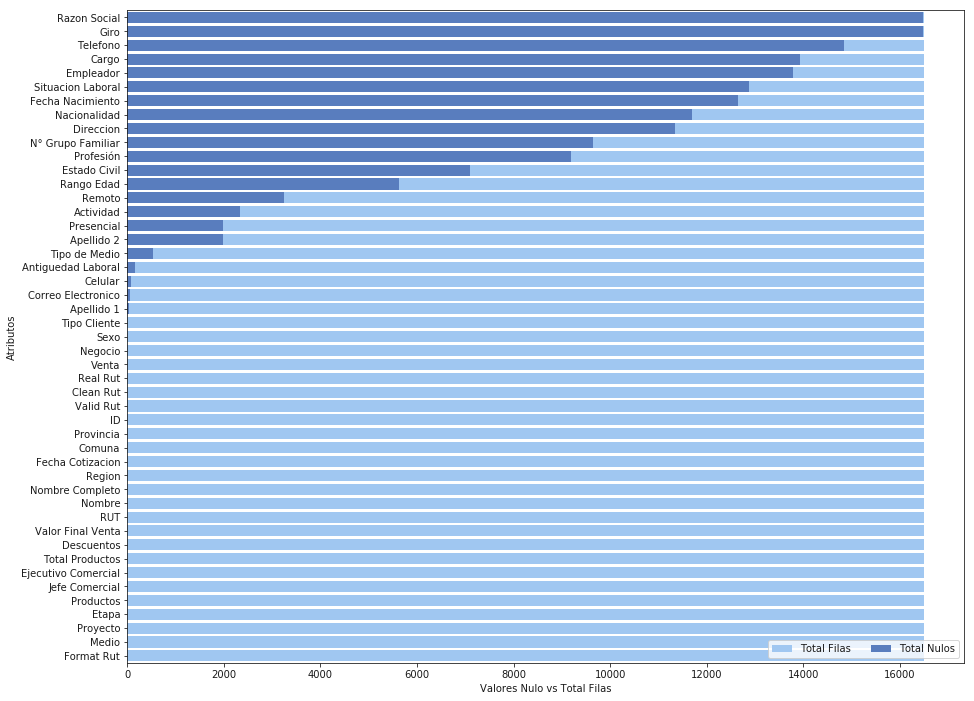

In [48]:
df = cot_mod.copy()
# df.replace([REPLACE_WITH], np.nan, inplace=True)
# df.replace(['Sin Información'], np.nan, inplace=True)

null_columns = df.columns[df.isnull().any()]
nulos = df[null_columns].isnull().sum()

#view all columns with its null count
null_columns = df.columns
null_df =  df.shape[0] - df.count()

null_df = pd.DataFrame({'Total':null_df,'Etiquetas':null_columns})

columnas = null_columns.copy()
filas = [df.shape[0]] * len(null_columns)

totales = pd.DataFrame({'Total':filas,'Etiquetas':columnas})

f, ax = plt.subplots(figsize=(15, 12))

sns.set_color_codes("pastel")
sns.barplot(data=totales.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Filas")

sns.set_color_codes("muted")
sns.barplot(data=null_df.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Nulos")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Atributos", xlabel="Valores Nulo vs Total Filas")
plt.show()
# sb.despine(left=True, bottom=True)
# f.savefig("..\\results\\cot_all_attributes_clean.png")

## 3.1 Nuevos Atributos

### 3.1.1 Edad
Variable construida a partir de la fecha de nacimiento

### 3.1.2 Descuento
Variable que indica si el cliente recibio descuento

In [49]:
cot_mod.Descuentos.describe()

count    16506.000000
mean        23.583815
std         70.315237
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2004.700000
Name: Descuentos, dtype: float64

In [50]:
# Construir 'descuento': binario : [True, False]
descuento = cot_mod['Descuentos'].tolist()


def is_desc(x):
    try:
        desc = int(x)
        if desc > 0:
            return True
        else:
            return False
    except ValueError:
        return False

# descuento = [is_desc(x) for x in recibio_descuento]

cot_mod['descuento'] = descuento
cot_mod['recibio_descuento'] = cot_mod['Descuentos'] > 0
# descuento

### 3.1.3.Cantidad de Productos

In [51]:
# Construir 'productos': categorico : ['depto','casa','estacionamiento','bodega','Estudio']
productos = cot_mod['Productos'].tolist()
depto = []; estacionamiento=[]; bodega = []; estudio = [];nan = 0

def get_products(x,word,numeric=False):
    w=0
    try:
        p =str(x)
        arr_p = x.split(',')
        for e in arr_p:
            if word in e:
                w+=1
#                 print(word + " :",e)
                break
            elif numeric and ('B' not in e or 'Est' not in e):
                try:
                    int(e)
#                     print(word + " :",e)
                    w+=1
                except ValueError:
                    pass
        return w
    except (ValueError,AttributeError):
        try:
            int(x)
            if numeric:
                return 1
            else:
                return 0
        except ValueError:
            return 0

cot_mod['#vivienda'] = [get_products(x,'T',numeric=True) for x in productos]
cot_mod['#bodega'] = [get_products(x,'Bod') for x in productos]
cot_mod['#estacionamiento'] = [get_products(x,'Est') for x in productos]
cot_mod['#estudio'] = [get_products(x,'Estudio') for x in productos]
cot_mod['#lan'] = [get_products(x,'lan') for x in productos]

In [52]:
print(cot_mod[['Productos','#vivienda','#bodega','#estacionamiento','#estudio','#lan']].head())
print(cot_mod[['Productos','#vivienda','#bodega','#estacionamiento','#estudio','#lan']].tail())

      Productos  #vivienda  #bodega  #estacionamiento  #estudio  #lan
2983         74          1        0                 0         0     0
2994         74          1        0                 0         0     0
3506  10,lan-10          1        0                 0         0     1
3604         10          1        0                 0         0     0
3648         10          1        0                 0         0     0
                 Productos  #vivienda  #bodega  #estacionamiento  #estudio  \
5255                    16          1        0                 0         0   
5417                    11          1        0                 0         0   
413          tb-71,est-004          0        0                 0         0   
475   tb-41,est-014,bod-01          0        0                 0         0   
476   tb-42,est-014,bod-01          0        0                 0         0   

      #lan  
5255     0  
5417     0  
413      0  
475      0  
476      0  


In [53]:
cot_mod = cot_mod.drop(['Productos'], axis=1)

### 3.1.4 Latitud y Longitud

### 3.1.6 Region

In [54]:
cot_mod.columns

Index(['ID', 'Fecha Cotizacion', 'Medio', 'Tipo de Medio', 'Proyecto', 'Etapa',
       'Presencial', 'Remoto', 'Jefe Comercial', 'Ejecutivo Comercial',
       'Total Productos', 'Descuentos', 'Valor Final Venta', 'RUT', 'Nombre',
       'Apellido 1', 'Apellido 2', 'Nombre Completo', 'Telefono', 'Celular',
       'Direccion', 'Region', 'Provincia', 'Comuna', 'Correo Electronico',
       'Sexo', 'Estado Civil', 'Rango Edad', 'Fecha Nacimiento',
       'Tipo Cliente', 'Razon Social', 'Giro', 'Nacionalidad',
       'N° Grupo Familiar', 'Actividad', 'Cargo', 'Situacion Laboral',
       'Empleador', 'Antiguedad Laboral', 'Profesión', 'Negocio', 'Venta',
       'Real Rut', 'Clean Rut', 'Valid Rut', 'Format Rut', 'descuento',
       'recibio_descuento', '#vivienda', '#bodega', '#estacionamiento',
       '#estudio', '#lan'],
      dtype='object')

In [55]:
cot_mod['Region'].unique()

array(['viii region del bio-bio', 'x region de los lagos',
       'xiii region metropolitana de santiago', 'iii region de atacama',
       'vii region del maule', 'v region de valparaiso',
       'i region de tarapaca',
       'xii region de magallanes y de la antartica chilena',
       'iv region de coquimbo', 'ii region de antofagasta',
       'ix region de la araucania',
       'vi region del libertador general bernardo o higgins',
       'xiv region de los rios',
       'xi region de aysen del general carlos ibanez del campo',
       'xv region de arica y parinacota'], dtype=object)

In [56]:
cot_mod['region'] = cot_mod['Region']
cot_mod['region'] = cot_mod['region'].replace(
    {'viii region del bio-bio':'bio-bio',
     'xiii region metropolitana de santiago':'metropolitana'}
)
cot_mod['region'] = cot_mod['region'].replace(
    ['ii region de antofagasta',
    'iv region de coquimbo', 
    'vii region del maule',
    'x region de los lagos',
    'v region de valparaiso',
    'vi region del libertador general bernardo o higgins',
    'xiv region de los rios',
    'xi region de aysen del general carlos ibanez del campo',
    'i region de tarapaca', 
    'ix region de la araucania',
    'xii region de magallanes y de la antartica chilena',
    'xv region de arica y parinacota',
     'xiv region de los rios',
    'iii region de atacama'],'otro'
)

cot_mod['region'].unique()

array(['bio-bio', 'otro', 'metropolitana'], dtype=object)

In [57]:
cot_mod = cot_mod.drop(['Region'], axis=1)

### 3.1.7 Provincia
Esta variable indica si el cliente facilito el correo en alguna cotizacion

In [58]:
cot_all['Provincia'].unique()

array(['concepcion', 'osorno', 'santiago', 'huasco', 'biobio', 'nuble',
       'talca', 'valparaiso', 'iquique', 'magallanes', 'arauco', 'limari',
       'antofagasta', 'cautin', 'el loa', 'elqui', 'llanquihue',
       'cachapoal', 'curico', 'valdivia', 'choapa', 'chacabuco', 'chiloe',
       'isla de pascua', 'cordillera', 'malleco', 'coyhaique',
       'san felipe de aconcagua', 'ultima esperanza', 'maipo',
       'melipilla', 'cauquenes', 'arica', 'copiapo', 'aysen', 'colchagua',
       'capitan prat', 'linares'], dtype=object)

In [59]:
cot_mod['provincia'] = cot_mod['Provincia'].copy()
cot_mod['provincia'] = cot_mod['provincia'].replace(
    {'concepcion':'concepcion',
     'santiago':'santiago'}
)
cot_mod['provincia'] = cot_mod['provincia'].replace(
    ['osorno', 'huasco', 'biobio', 'nuble',
       'talca', 'valparaiso', 'iquique', 'magallanes', 'arauco', 'limari',
       'antofagasta', 'cautin', 'el loa', 'elqui', 'llanquihue',
       'cachapoal', 'curico', 'valdivia', 'choapa', 'chacabuco', 'chiloe',
       'isla de pascua', 'cordillera', 'malleco', 'coyhaique',
       'san felipe de aconcagua', 'ultima esperanza', 'maipo',
       'melipilla', 'cauquenes', 'arica', 'copiapo', 'aysen', 'colchagua',
       'capitan prat', 'linares'],'otro'
)
cot_mod['provincia'].unique()

array(['concepcion', 'otro', 'santiago'], dtype=object)

In [60]:
cot_mod = cot_mod.drop(['Provincia'], axis=1)

### 3.1.8 Comuna
Esta variable indica si el cliente facilito el correo en alguna cotizacion

In [61]:
cot_all['Comuna'].unique()

array(['concepcion', 'osorno', 'chiguayante', 'hualpen', 'santiago',
       'huasco', 'talcahuano', 'los angeles', 'penalolen', 'coelemu',
       'talca', 'penco', 'san pedro de la paz', 'lota', 'vina del mar',
       'iquique', 'punta arenas', 'tome', 'arauco', 'coronel', 'ovalle',
       'estacion central', 'chillan', 'curanilahue', 'concon',
       'providencia', 'las condes', 'la florida', 'huechuraba',
       'antofagasta', 'quillon', 'valparaiso', 'temuco', 'yungay',
       'san carlos', 'calama', 'canete', 'coquimbo', 'nunoa', 'cabrero',
       'puerto montt', 'lebu', 'independencia', 'vitacura', 'machali',
       'curico', 'alto biobio', 'la serena', 'santa juana', 'los alamos',
       'la reina', 'pudahuel', 'punitaqui', 'mulchen', 'yumbel', 'maipu',
       'san rosendo', 'llanquihue', 'valdivia', 'hualqui', 'illapel',
       'colina', 'castro', 'lampa', 'contulmo', 'villarrica',
       'chillan viejo', 'el bosque', 'laja', 'isla de pascua', 'renca',
       'pirque', 'collipul

In [62]:
comunas = ['Concepcion',   'Coronel',  'Chiguayante',  'Florida',  'Hualqui',  
 'Lota',  'Penco',  'San Pedro de la Paz',  'Santa Juana',  
 'Talcahuano',  'Tome',  'Hualpen',
'Santiago',  'Cerrillos',  'Cerro Navia',  'Conchali',  'El Bosque',  
 'Estacion Central',  'Huechuraba',  'Independencia',  'La Cisterna',  'La Florida',  'La Granja',  
 'La Pintana',  'La Reina',  'Las Condes',  'Lo Barnechea',  'Lo Espejo',  'Lo Prado',  'Macul',  'Maipu',  
 'nunoa',  'Pedro Aguirre Cerda',  'Peñalolén',  'Providencia',  'Pudahuel',  'Quilicura',  
 'Quinta Normal',  'Recoleta',  'Renca',  'San Joaquin',  'San Miguel',  'San Ramon',  'Vitacura']
comunas = [x.lower() for x in comunas]

print(comunas)

['concepcion', 'coronel', 'chiguayante', 'florida', 'hualqui', 'lota', 'penco', 'san pedro de la paz', 'santa juana', 'talcahuano', 'tome', 'hualpen', 'santiago', 'cerrillos', 'cerro navia', 'conchali', 'el bosque', 'estacion central', 'huechuraba', 'independencia', 'la cisterna', 'la florida', 'la granja', 'la pintana', 'la reina', 'las condes', 'lo barnechea', 'lo espejo', 'lo prado', 'macul', 'maipu', 'nunoa', 'pedro aguirre cerda', 'peñalolén', 'providencia', 'pudahuel', 'quilicura', 'quinta normal', 'recoleta', 'renca', 'san joaquin', 'san miguel', 'san ramon', 'vitacura']


In [63]:
cot_mod['comuna'] = cot_mod['Comuna'].copy()

cot_mod['comuna'] = [x if x in comunas else 'otro' for x in cot_mod['comuna'].tolist()]

cot_mod['comuna'].unique()

array(['concepcion', 'otro', 'chiguayante', 'hualpen', 'santiago',
       'talcahuano', 'penco', 'san pedro de la paz', 'lota', 'tome',
       'coronel', 'estacion central', 'providencia', 'las condes',
       'la florida', 'huechuraba', 'nunoa', 'independencia', 'vitacura',
       'santa juana', 'la reina', 'pudahuel', 'maipu', 'hualqui',
       'el bosque', 'renca', 'cerrillos', 'conchali', 'quilicura',
       'la cisterna', 'san ramon', 'san miguel', 'florida'], dtype=object)

In [64]:
cot_mod = cot_mod.drop(['Comuna'], axis=1)

### 3.1.9 Atributos Provistos


In [65]:
cot_mod['is_nombre'] = ~cot_mod['Nombre'].isnull()
cot_mod['is_apellido1'] = ~cot_mod['Apellido 1'].isnull()
cot_mod['is_apellido2'] = ~cot_mod['Apellido 2'].isnull()
cot_mod['is_nombrecompleto'] = ~cot_mod['Nombre Completo'].isnull()
cot_mod['is_correo'] = ~cot_mod['Correo Electronico'].isnull()
cot_mod['is_direccion'] = ~cot_mod['Direccion'].isnull()
cot_mod['is_telefono'] = ~cot_mod['Telefono'].isnull()
cot_mod['is_actividad'] = ~cot_mod['Actividad'].isnull()
cot_mod['is_estado_civil'] = ~cot_mod['Estado Civil'].isnull()
cot_mod['is_fnac'] = ~cot_mod['Fecha Nacimiento'].isnull()
cot_mod['is_celular'] = ~cot_mod['Celular'].isnull()

# cot_mod['is_profesion'] = ~cot_mod['profesion_agg'].isnull()
cot_mod['is_profesion'] = ~cot_mod['Profesión'].isnull()
# cot_mod['is_profesion'] = ~cot_mod['Profesión'].isnull()


# cot_mod = cot_mod.drop(['Profesión','Telefono','Correo Electronico','Telefono','Nombre','Apellido 1','Apellido 2','Nombre Completo'], axis=1)

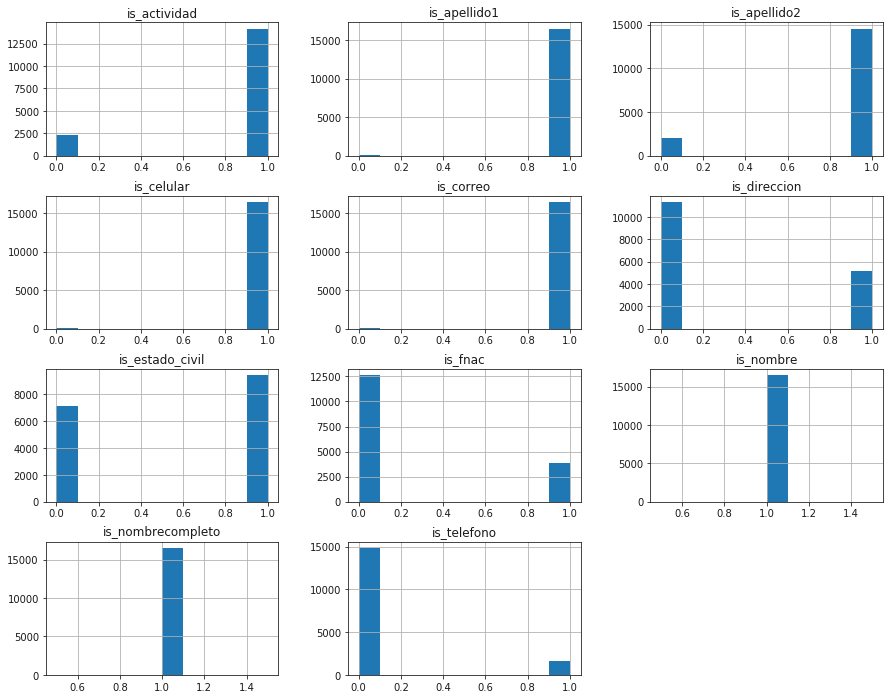

In [66]:
arr = ['is_nombre', 'is_apellido1', 'is_apellido2', 'is_nombrecompleto', 
       'is_correo', 'is_direccion', 'is_telefono', 'is_actividad', 'is_estado_civil',
        'is_fnac', 'is_celular']

cot_mod[arr].hist(figsize=(15,12))
plt.show()

### 3.1.9 Atributos Provistos
Esta variable indica el numero de veces que el cliente ha hecho cotizaciones

### 3.1.4 Total Productos Cotizados

In [67]:
precio_cotizacion_media = []
precio_cotizacion_std = []
precio_cotizacion_median = []
for group, frame in cot_mod.groupby('RUT'):
    media = float("%.2f" % np.mean(frame['Total Productos'].tolist()))
    std = float("%.2f" % np.std(frame['Total Productos'].tolist()))
    median = float("%.2f" % np.median(frame['Total Productos'].tolist()))
#     print(group, media, std, median)
    precio_cotizacion_media.append(media)
    precio_cotizacion_std.append(std)
    precio_cotizacion_median.append(median)

print(len(precio_cotizacion_media))
print(len(precio_cotizacion_std))
print(len(precio_cotizacion_median))

6180
6180
6180


### 3.1.4 Tiempo entre cotizaciones

In [68]:
cot_mod['Fecha Cotizacion'] = pd.to_datetime(cot_mod['Fecha Cotizacion'])
tiempo_cotizacion_media = []
tiempo_cotizacion_std = []
tiempo_cotizacion_median = []

for group, frame in cot_mod.groupby('RUT'):
    l = frame['Fecha Cotizacion'].tolist()
    l = [x.date() for x in l]
    l = sorted(l, reverse=False)
    d = []
    anterior = l[0]
    if len(l) != 1:
        for i in range(1,len(l)):
            try:
                dif = abs(int(str(l[i] - anterior).split(' ')[0]))
            except ValueError:
                d.append(0)
            anterior = l[i]
            d.append(dif)
        
    else:
        d.append(0)
    mean = float( '%.2f'%np.mean(d))
    std = float( '%.2f'%np.std(d))
    median = float( '%.2f'%np.median(d))
    tiempo_cotizacion_media.append(mean)
    tiempo_cotizacion_std.append(std)
    tiempo_cotizacion_median.append(median)

print(len(tiempo_cotizacion_media))
print(len(tiempo_cotizacion_std))
print(len(tiempo_cotizacion_median))    
    

6180
6180
6180


In [69]:
tiempo_cotizacion_media

[1250.0,
 625.0,
 30.0,
 15.0,
 55.0,
 7.0,
 0.0,
 0.0,
 0.0,
 35.5,
 0.0,
 0.0,
 0.0,
 0.0,
 40.57,
 0.0,
 16.71,
 0.0,
 2.0,
 898.0,
 9.0,
 7.0,
 494.67,
 0.0,
 23.33,
 17.5,
 0.0,
 15.43,
 0.0,
 0.0,
 0.0,
 98.0,
 0.0,
 73.5,
 38.75,
 2.5,
 0.0,
 2.5,
 21.12,
 0.0,
 0.0,
 11.33,
 26.0,
 0.0,
 13.0,
 5.5,
 5.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.5,
 0.0,
 5.5,
 0.0,
 0.0,
 0.0,
 228.11,
 0.0,
 200.67,
 150.5,
 104.0,
 0.0,
 5.5,
 5.5,
 0.0,
 0.0,
 0.0,
 67.0,
 33.5,
 0.0,
 0.0,
 56.0,
 28.0,
 28.0,
 0.0,
 79.5,
 1.0,
 1.0,
 1.0,
 0.0,
 39.08,
 2.5,
 2.5,
 2.5,
 0.0,
 2.5,
 0.0,
 9.0,
 0.0,
 5.67,
 0.0,
 4.0,
 4.0,
 96.0,
 83.64,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 33.0,
 0.0,
 0.0,
 93.0,
 0.0,
 0.57,
 26.65,
 9.0,
 133.54,
 121.5,
 682.67,
 466.0,
 0.0,
 0.0,
 0.0,
 7.0,
 210.25,
 37.53,
 0.0,
 0.0,
 0.0,
 12.6,
 0.0,
 2.67,
 0.0,
 3.5,
 3.5,
 0.0,
 33.0,
 0.0,
 16.5,
 10.0,
 24.0,
 33.0,
 14.8,
 4.0,
 0.0,
 4.0,
 0.0,
 31.2,
 0.0,
 2.5,
 15.0,
 7.5,
 7.5,
 16.17,
 38.5,


### 3.1.4 Cotizaciones por Proyecto

In [70]:
rut_dict = dict()

    
for index, row in cot_mod.iterrows():
    rut = row['Format Rut']
    pr = row['Proyecto']
    
    if rut not in rut_dict.keys():
        rut_dict[rut] = dict()
        rut_dict[rut]['altos del valle'] = 0
        rut_dict[rut]['edificio urban 1470'] = 0
        rut_dict[rut]['san andres del valle'] = 0
        rut_dict[rut]['edificio mil610'] = 0
        rut_dict[rut]['edificio junge'] = 0
    
    rut_dict[rut][pr] +=1



rut_proyectos = pd.DataFrame.from_dict(rut_dict,orient='index').reset_index()
rut_proyectos.head()

# cot_mod = pd.merge(cot_mod_cp, rut_proyectos,how='left', left_on='Format Rut', right_on='index')

,index,altos del valle,edificio urban 1470,san andres del valle,edificio mil610,edificio junge
0,000.000.000-0,0,1,1,0,0
1,1.462.558-5,0,0,0,1,0
2,10.000.513-1,0,0,0,0,2
3,10.000.522-0,0,0,0,0,2
4,10.005.853-7,0,0,0,0,2


In [71]:
cot_mod.columns

Index(['ID', 'Fecha Cotizacion', 'Medio', 'Tipo de Medio', 'Proyecto', 'Etapa',
       'Presencial', 'Remoto', 'Jefe Comercial', 'Ejecutivo Comercial',
       'Total Productos', 'Descuentos', 'Valor Final Venta', 'RUT', 'Nombre',
       'Apellido 1', 'Apellido 2', 'Nombre Completo', 'Telefono', 'Celular',
       'Direccion', 'Correo Electronico', 'Sexo', 'Estado Civil', 'Rango Edad',
       'Fecha Nacimiento', 'Tipo Cliente', 'Razon Social', 'Giro',
       'Nacionalidad', 'N° Grupo Familiar', 'Actividad', 'Cargo',
       'Situacion Laboral', 'Empleador', 'Antiguedad Laboral', 'Profesión',
       'Negocio', 'Venta', 'Real Rut', 'Clean Rut', 'Valid Rut', 'Format Rut',
       'descuento', 'recibio_descuento', '#vivienda', '#bodega',
       '#estacionamiento', '#estudio', '#lan', 'region', 'provincia', 'comuna',
       'is_nombre', 'is_apellido1', 'is_apellido2', 'is_nombrecompleto',
       'is_correo', 'is_direccion', 'is_telefono', 'is_actividad',
       'is_estado_civil', 'is_fnac', 'is

### 3.1.9 Rango Edad
Esta variable indica el numero de veces que el cliente ha hecho cotizaciones

In [72]:
### Ver edades en cotizantes y cotizantes que llegan a negocios
rango_edad = cot_mod['Rango Edad'].tolist()
rango_edad_min = [];rango_edad_max = []

for e in rango_edad:
    try:
        edad = e.split('-')
        rango_edad_min.append(int(edad[0]))
        rango_edad_max.append(int(edad[1]))
    except (ValueError, AttributeError):
        rango_edad_min.append(0)
        rango_edad_max.append(0)
        
cot_mod['Edad Min'] = rango_edad_min
cot_mod['Edad Max'] = rango_edad_max

### 3.1.11 Negocio
Indica si el cliente siguio el proceso de cotizacion y lo transformo en un proceso de negocio

In [73]:
# ruts de los clientes en negocio
neg_ids = neg_all['ID Cotizacion'].unique().tolist()

# cot_neg = cot_all.copy()
cot_mod['Negocio'] = cot_mod['ID'].isin(neg_ids)
cot_mod[cot_mod['Negocio'] == True].shape

(2336, 67)

### 3.1.11 Venta
Indica si el cliente siguio el proceso de negocio y lo transformo en un proceso de venta

In [74]:
# Venta Sesgadores
personas_ventas = dict()
total_ventas = 0
search = ['Escriturado', 'Entregado']

for group, frame in neg_all.groupby('RUT'):
    compras_persona = 0
    for id_cot in frame['Estado'].tolist():
        if search[0] == id_cot or search[1] == id_cot:
            compras_persona += 1
#             print(group, id_cot)
            if group not in personas_ventas.keys():
                personas_ventas[group] = dict()
            personas_ventas[group]['compro'] = True
            total_ventas += 1
            personas_ventas[group]['total'] = compras_persona
#     print()

        
            
print('filas negocios', neg_all.shape[0])
print('filas ventas', total_ventas)
print('personas que hicieron negocio', neg_all.RUT.nunique())
print('personas que compraron',len(personas_ventas))

filas negocios 2347
filas ventas 291
personas que hicieron negocio 1103
personas que compraron 288


In [75]:
neg_all[(neg_all.Estado == 'Escriturado') | (neg_all.Estado == 'Entregado')]['ID Cotizacion'].tolist()

[79631,
 79655,
 80512,
 86617,
 88781,
 91954,
 95799,
 97220,
 97688,
 100164,
 100210,
 107339,
 108138,
 109361,
 110345,
 114131,
 115503,
 116397,
 118512,
 122348,
 124791,
 125947,
 128061,
 131906,
 132930,
 132944,
 132947,
 97424,
 98240,
 98902,
 100809,
 102297,
 102788,
 102897,
 103237,
 103809,
 104320,
 104530,
 108331,
 111266,
 111783,
 114095,
 116756,
 118353,
 119073,
 119515,
 121646,
 125999,
 126767,
 127381,
 127707,
 128022,
 129122,
 129232,
 131745,
 132978,
 30892,
 30894,
 30895,
 30897,
 30898,
 30899,
 30900,
 30901,
 30902,
 30904,
 30905,
 30906,
 30870,
 30907,
 30909,
 31095,
 31096,
 31374,
 32239,
 32279,
 32377,
 33203,
 34203,
 35640,
 35910,
 36220,
 36310,
 36370,
 36676,
 37255,
 37282,
 37348,
 37829,
 37930,
 38892,
 39238,
 39340,
 40752,
 41224,
 41592,
 42511,
 44025,
 47048,
 47579,
 47703,
 47731,
 48594,
 49532,
 50849,
 51190,
 51665,
 51760,
 51773,
 51814,
 51912,
 51972,
 52148,
 53291,
 53388,
 53631,
 53784,
 54103,
 54784,
 550

In [76]:
# print(len(personas_ventas.keys()))
# for key, value in personas_ventas.items():
#     print(key, value)
#     if value['total'] > 1:
#         pass
#         print(key, value['total'])

In [77]:
# ruts de los clientes en negocio
mask = (neg_all.Estado == 'Escriturado') | (neg_all.Estado == 'Entregado')
entregado_n_escriturado = neg_all[mask]['ID Cotizacion'].tolist()
# neg_ids = neg_all['ID Cotizacion'].unique().tolist()

# cot_neg = cot_all.copy()
cot_mod['Compra'] = cot_mod['ID'].isin(entregado_n_escriturado)
cot_mod[cot_mod['Compra'] == True].shape

(291, 68)

### 3.1.12 N° Grupo Familiar


In [78]:
cot_mod['N° Grupo Familiar']=cot_mod['N° Grupo Familiar'].fillna('Sin Información')

In [79]:
def is_nrofam(x):
    if x == 'Sin Información':
        return False
    elif x == np.nan:
        return False
    else:
        return True

cot_mod['is_nrofam'] = [ is_nrofam(x) for x in cot_mod['N° Grupo Familiar'] ]

In [80]:
cot_mod.to_excel('..\\..\\Datos\\working\\cotizaciones_transformed.xlsx')

### 3.1.12 N° Grupo Familiar


### 3.2. Extraccion de Datos
Esta variable indica el numero de veces que el cliente ha hecho cotizaciones

### 3.1.10.Tiempo entre Cotizaciones
Esta variable indica el numero de veces que el cliente ha hecho cotizaciones

# 4.Integrate Data

In [89]:
# Construir '#cotizaciones' a partir del nro de filas donde participa el mismo rut
cot_ruts = pd.DataFrame()

nro_cot_depto, nro_cot_esta, nro_cot_estu, nro_cot_bod  = [], [], [], []
mean_cot_depto, mean_cot_esta, mean_cot_estu, mean_cot_bod = [], [], [], []
nro_proyectos = []

ruts, ruts_nro_cot, rut_reg, rut_prov , rut_com = [], [], [] , [], []

is_nombre, is_apellido1, is_apellido2, is_nombrecompleto, is_direccion = [], [], [], [], [] 
is_telefono, is_celular, is_fnac, is_nrofam, is_profesion = [], [], [], [], []
is_recontacto, is_descuento = [], []
is_remoto, is_presencial = [], []
descuento = []
valid_rut = []

primer_medio = []
rut = []

max_rango_edad, profesion = [], []

actividad = []

negocio, compra = [], []

tipo_cliente = []

sexo = []

compra = []

nombres, apellidos1, apellidos2, celulares, \
correos, direcciones, trabajos, edades, ruts_originales = [], [], [], [], [], [], [], [], []

iterator = 0
for group, frame in  cot_mod.groupby('Format Rut'):
    iterator += 1
    
    nombres.append(frame['Nombre'].tolist()[0])
    apellidos1.append(frame['Apellido 1'].tolist()[0])
    apellidos2.append(frame['Apellido 2'].tolist()[0])
    celulares.append(frame['Celular'].tolist()[0])
    correos.append(frame['Correo Electronico'].tolist()[0])
    direcciones.append(frame['Direccion'].tolist()[0])
    trabajos.append(frame['Profesión'].tolist()[0])
    edades.append(frame['Rango Edad'].tolist()[0])
    ruts_originales.append(frame['RUT'].tolist()[0])
    
    is_nombre.append(frame['is_nombre'].tolist()[0])
    is_apellido1.append(frame['is_apellido1'].tolist()[0])
    is_apellido2.append(frame['is_apellido2'].tolist()[0])
    is_nombrecompleto.append(frame['is_nombrecompleto'].tolist()[0])
    is_direccion.append(frame['is_direccion'].tolist()[0])
    is_telefono.append(frame['is_telefono'].tolist()[0])
    is_celular.append(frame['is_celular'].tolist()[0])
    is_fnac.append(frame['is_fnac'].tolist()[0])
    is_profesion.append(frame['is_profesion'].tolist()[0])
    is_nrofam.append(frame['is_nrofam'].tolist()[0])
    valid_rut.append(frame['Valid Rut'].tolist()[0])
    
    if 'Si' in frame['Presencial'].tolist():
        is_presencial.append(True)
    else: 
        is_presencial.append(False)
    
    if 'Si' in frame['Remoto'].tolist():
        is_remoto.append(True)
    else: 
        is_remoto.append(False)
        
    
    if frame['Medio'].tolist()[-1] == 'RECONTACTO':
        is_recontacto.append(True)
    else:
        is_recontacto.append(False)
    
    primer_medio.append(frame['Medio'].tolist()[0])
    
    profesion.append(frame['Profesión'].tolist()[0])
    rut.append(group)
    sexo.append(frame['Sexo'].tolist()[0])
    
    actividad.append(frame['Actividad'].tolist()[0])
    
    tipo_cliente.append(frame['Tipo Cliente'].tolist()[0])
    
    max_rango_edad.append(frame['Edad Max'].tolist()[0])

    nro_proyectos.append(len(frame['Proyecto'].unique()))
    
    # descuento
    if True in frame['recibio_descuento'].tolist():
        is_descuento.append(True)
    else:
        is_descuento.append(False)
    #proceso negocio
    arr = frame['Negocio'].tolist()
    if True in arr:   
        negocio.append(True)
    else:
        negocio.append(False)
    #compro vivienda
    if True in frame['Compra'].tolist():
        compra.append(True)
    else:
        compra.append(False)
    
    ruts.append(group)
    rut_reg.append(frame['region'].tolist()[0])
    rut_prov.append(frame['provincia'].tolist()[0])
    rut_com.append(frame['comuna'].tolist()[0])
    
    nro_cot_depto.append(frame['#vivienda'].sum())
    nro_cot_bod.append(frame['#bodega'].sum())
    nro_cot_esta.append(frame['#estacionamiento'].sum())
    nro_cot_estu.append(frame['#estudio'].sum())
    
    mean_cot_depto.append(frame['#vivienda'].mean())
    mean_cot_bod.append(frame['#bodega'].mean())
    mean_cot_esta.append(frame['#estacionamiento'].mean())
    mean_cot_estu.append(frame['#estudio'].mean())
    ruts_nro_cot.append(frame['ID'].count())
    
print(iterator)

6180


In [90]:
print(len(ruts), 'ruts')
print(len(rut_reg))
print(len(rut_prov))
print(len(rut_com))
print(len(nro_proyectos))
print(len(nro_cot_bod))
print(len(nro_cot_depto))
print(len(nro_cot_esta))
print(len(nro_cot_estu))
print(len(mean_cot_bod))
print(len(mean_cot_depto))
print(len(mean_cot_esta))
print(len(mean_cot_estu))
print(len(negocio))
print(len(is_nombre))
print(len(is_apellido1))
print(len(is_apellido2))
print(len(is_nombrecompleto))
print(len(is_direccion))
print(len(is_telefono))
print(len(is_celular))
print(len(is_fnac))
print(len(max_rango_edad))
print(len(tipo_cliente))
print(len(sexo))
print(len(is_nrofam))
print(len(is_profesion))
print(len(profesion))
print(len(is_recontacto))
print(len(primer_medio))
print(len(actividad))
print(len(is_descuento))
print(len(is_remoto))
print(len(is_presencial))
print(len(valid_rut))
print(len(compra))
print(len(ruts))

#             tiempo_cotizacion_media, tiempo_cotizacion_std, tiempo_cotizacion_median,
#              precio_cotizacion_media, precio_cotizacion_std, precio_cotizacion_median

6180 ruts
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180
6180


## NEW DATASET: Personas Dataset

In [91]:
list_cols = [ruts, rut_reg, rut_prov, rut_com, 
             nro_proyectos,nro_cot_bod, nro_cot_depto, nro_cot_esta, nro_cot_estu, 
             mean_cot_bod, mean_cot_depto,mean_cot_esta,mean_cot_estu, 
             negocio,
             is_nombre, is_apellido1, is_apellido2, is_nombrecompleto, is_direccion, is_telefono,
             is_celular, is_fnac, 
             max_rango_edad, tipo_cliente, sexo,
             is_nrofam, 
             is_profesion, 
             profesion, 
             is_recontacto, primer_medio, 
             actividad, is_descuento, is_remoto, is_presencial, valid_rut, 
             compra, 
             tiempo_cotizacion_media, tiempo_cotizacion_std, tiempo_cotizacion_median,
             precio_cotizacion_media, precio_cotizacion_std, precio_cotizacion_median,
             nombres, apellidos1, apellidos2, celulares, correos, direcciones, trabajos, edades, ruts_originales
            ]

list_labels = ['rut','loc_region','loc_provincia','loc_comuna','nro_proyectos','nro_cot_bod', 'nro_cot_depto', 
               'nro_cot_esta', 'nro_cot_estu', 'mean_cot_bod',
               'mean_cot_depto','mean_cot_esta','mean_cot_estu','negocio',
               'is_nombre','is_apellido1','is_apellido2','is_nombrecompleto','is_direccion','is_telefono',
               'is_celular','is_fnac','max_rango_edad','tipo_cliente','sexo','is_nrofam','is_profesion',
               'profesion',
               'is_recontacto', 'medio_inicial', 'actividad', 'is_descuento', 'is_remoto', 'is_presencial', 'valid_rut', 
               'compra',
            'tiempo_cotizacion_media', 'tiempo_cotizacion_std', 'tiempo_cotizacion_median',
                'precio_cotizacion_media', 'precio_cotizacion_std', 'precio_cotizacion_median',
               'nombre', 'apellido1', 'apellido2', 'celular', 'correo', 'direccion', 'trabajo', 'edad', 'rut_original'
              ]

zipped = list(zip(list_labels,list_cols))
data = dict(zipped)
personas = pd.DataFrame(data)
print(personas.shape)
personas.head()

(6180, 51)


,actividad,apellido1,apellido2,celular,compra,correo,direccion,edad,is_apellido1,is_apellido2,...,profesion,rut,rut_original,sexo,tiempo_cotizacion_media,tiempo_cotizacion_median,tiempo_cotizacion_std,tipo_cliente,trabajo,valid_rut
0,profesional,garreton,NaN,0,False,mariacruz.garreton@gmail.com,NaN,NaN,True,False,...,abogado,000.000.000-0,000000000-0,femenino,1250.0,1250.0,0.0,natural,abogado,True
1,empleado,prado,NaN,562232326,False,gargolasdos@yahoo.es,NaN,NaN,True,False,...,NaN,1.462.558-5,1462558-5,masculino,625.0,625.0,625.0,natural,NaN,True
2,empleado,norambuena,NaN,942825199,False,enorambuena@santander.cl,NaN,41-50,True,False,...,NaN,10.000.513-1,10000513-1,masculino,30.0,30.0,0.0,natural,NaN,True
3,profesional,jury,santibanez,56987290328,True,juryplastic@gmail.com,"camino del sur 472,idahue",41-50,True,True,...,medico,10.000.522-0,10000522-0,masculino,15.0,15.0,15.0,natural,medico,True
4,NaN,garcia,carillo,97541759,False,pilidesotomayor@gmail.com,NaN,NaN,True,True,...,NaN,10.005.853-7,10005853-7,femenino,55.0,55.0,0.0,natural,NaN,True


In [92]:
personas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6180 entries, 0 to 6179
Data columns (total 51 columns):
actividad                   4985 non-null object
apellido1                   6155 non-null object
apellido2                   5200 non-null object
celular                     6140 non-null object
compra                      6180 non-null bool
correo                      6142 non-null object
direccion                   1321 non-null object
edad                        3571 non-null object
is_apellido1                6180 non-null bool
is_apellido2                6180 non-null bool
is_celular                  6180 non-null bool
is_descuento                6180 non-null bool
is_direccion                6180 non-null bool
is_fnac                     6180 non-null bool
is_nombre                   6180 non-null bool
is_nombrecompleto           6180 non-null bool
is_nrofam                   6180 non-null bool
is_presencial               6180 non-null bool
is_profesion                6180 

In [93]:
personas.replace([np.nan], 'sin informacion', inplace=True)

In [94]:
personas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6180 entries, 0 to 6179
Data columns (total 51 columns):
actividad                   6180 non-null object
apellido1                   6180 non-null object
apellido2                   6180 non-null object
celular                     6180 non-null object
compra                      6180 non-null bool
correo                      6180 non-null object
direccion                   6180 non-null object
edad                        6180 non-null object
is_apellido1                6180 non-null bool
is_apellido2                6180 non-null bool
is_celular                  6180 non-null bool
is_descuento                6180 non-null bool
is_direccion                6180 non-null bool
is_fnac                     6180 non-null bool
is_nombre                   6180 non-null bool
is_nombrecompleto           6180 non-null bool
is_nrofam                   6180 non-null bool
is_presencial               6180 non-null bool
is_profesion                6180 

In [95]:
print(len(personas[personas.negocio == True]))
print(len(personas[personas.compra == True]))

1101
288


## Incorporate Proyectos RUT Data

In [104]:
rut_proyectos.head()

,index,altos del valle,edificio urban 1470,san andres del valle,edificio mil610,edificio junge
0,000.000.000-0,0,1,1,0,0
1,1.462.558-5,0,0,0,1,0
2,10.000.513-1,0,0,0,0,2
3,10.000.522-0,0,0,0,0,2
4,10.005.853-7,0,0,0,0,2


In [106]:
# rut_proyectos es un dataset que describe el comportamiento de las personas en sus cotizaciones en los proyectos
personas = pd.merge(personas, rut_proyectos, how = 'inner', left_on='rut', right_on='index')
personas = personas.drop(['index'],axis=1)

In [107]:
print(len(personas['rut'].unique()))

6180


In [ ]:
# personas.columns

In [ ]:
# personas.info()

In [ ]:
# ruts_scrapped.info()

## Scrapped RUT Data

In [ ]:
# ruts_scrapped = pd.read_csv('..\\..\\Datos\\working\\ruts_scrapped_mod.csv',encoding = "ISO-8859-1")
# ruts_scrapped.drop('Unnamed: 0',axis=1,inplace=True)
# print(ruts_scrapped.shape)
# ruts_scrapped.head()

In [ ]:
# print(len(personas['rut'].unique()))
# print(personas.shape)

## Incorporate Scrapped RUT Data

In [ ]:
# personas.columns

In [ ]:
# ruts_scrapped.columns

In [ ]:
# personas = pd.merge(personas, ruts_scrapped, how='outer', left_on='rut', right_on='RUT')

In [ ]:
# personas.shape[0]

In [ ]:
# personas = personas.drop(['Name','Adress','Comuna','RUT'], axis=1)

In [109]:
personas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6180 entries, 0 to 6179
Data columns (total 56 columns):
actividad                   6180 non-null category
apellido1                   6180 non-null object
apellido2                   6180 non-null object
celular                     6180 non-null object
compra                      6180 non-null bool
correo                      6180 non-null object
direccion                   6180 non-null object
edad                        6180 non-null object
is_apellido1                6180 non-null bool
is_apellido2                6180 non-null bool
is_celular                  6180 non-null bool
is_descuento                6180 non-null bool
is_direccion                6180 non-null bool
is_fnac                     6180 non-null bool
is_nombre                   6180 non-null bool
is_nombrecompleto           6180 non-null bool
is_nrofam                   6180 non-null bool
is_presencial               6180 non-null bool
is_profesion                618

In [ ]:
# f = plt.figure(figsize=(15,12))
# sns.factorplot(x='sexo', kind='count', data=personas);

In [ ]:
# def clean_sex(x,y):
#     x = str(x)
#     x = x.replace(' ','')
#     if x == 'VAR':
#         return 'Masculino'
#     elif x == 'MUJ':
#         return 'Femenino'
#     else:
#         return y

# personas['sexo'] = [clean_sex(x,y) for x,y in zip(personas['Gender'].values, personas['sexo'].values)]

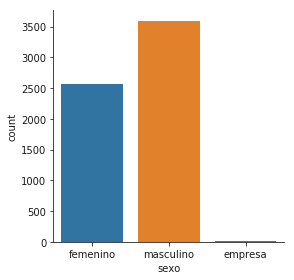

In [97]:
personas.sexo = personas.sexo.replace({'sin informacion':'femenino'})
sns.factorplot(x='sexo', kind='count', data=personas);

In [ ]:
# personas = personas.drop(['Gender'],axis=1)

In [99]:
# print(personas.tipo_cliente.isnull().sum())
personas.tipo_cliente = personas.tipo_cliente.replace(['Natural'],'natural')

# 5.Format Data

In [100]:
print(len(personas['rut'].unique()))
personas.shape

6180


(6180, 51)

In [101]:
personas['loc_comuna'] = personas['loc_comuna'].astype('category')
personas['loc_provincia'] = personas['loc_provincia'].astype('category')
personas['loc_region'] = personas['loc_region'].astype('category')
personas['tipo_cliente'] = personas['tipo_cliente'].astype('category')
personas['sexo'] = personas['sexo'].astype('category')
personas['profesion'] = personas['profesion'].astype('category')
personas['medio_inicial'] = personas['medio_inicial'].astype('category')
personas['actividad'] = personas['actividad'].astype('category')

# personas = personas.dropna()

In [108]:
personas.to_csv('..\\..\\Datos\\experiments\\personas_cotizacion10.csv')
personas.to_excel('..\\..\\Datos\\experiments\\personas_cotizacion10.xlsx')